In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pymannkendall as mk
import matplotlib.pyplot as plt
import matplotlib
#import statsmodels.api as sm
%matplotlib inline
import glob
import os
import seaborn as sns
# sns.set(style='darkgrid')
import chart_studio.plotly as py
import plotly.graph_objs as go


C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import shapefiles and merge by GEOID
# ========================================
from pathlib import Path
import geopandas as gpd

# reading the shapefile
# define the file location
folder = Path(r"D:\Work\Box Sync\Trends_all states\Maps_2020\\")
# reading the zip file
shapefiles = folder.glob("tl_2020_*_place.zip")
gdf = pd.concat([gpd.read_file(shp) for shp in shapefiles]).pipe(gpd.GeoDataFrame)
gdf = gdf.set_crs("EPSG:4269")
gdf.to_file(folder / 'compiled.shp')

US_places = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\compiled.shp')
US_counties = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2020_us_county.zip')
US_states = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2020_us_state.zip')

US_states = US_states.to_crs('EPSG:9311')
US_places = US_places.to_crs('EPSG:9311')
US_counties = US_counties.to_crs('EPSG:9311')

C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [3]:
# applying mann kendall on the dataframe column containing the time series values
def mk_trend_from_df(df, column_name, mk_param_alpha, file_save_path):

    # filtering rows that have atleast 3 values to find trend
    test_res = []
    for i in range(0,len(df[column_name])):
        if (len(df.iloc[i][column_name])>2):
            result = mk.original_test(np.asarray(df.iloc[i][column_name]), alpha=mk_param_alpha) 
        else:
            result = ('no data', 'NA',0,0,0,0,0,0,0) 
        test_res.append(result)
    df[['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']] =  test_res
    df.to_csv(file_save_path + "_mk_result.csv")
    return df

In [4]:
def plot_trend(df, var_col, *kwdargs):
    # define attributes
    xlabel = "X_axis"
    ylabel = "Y_axis"
    title =  "Plot_title"
    width = 20
    depth = 10
    plt.figure(figsize=(width, depth))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # craete the plot
    for i in range(len(df[var_col])):
        plt.plot(np.asarray(df.iloc[i][var_col]))

    plt.legend()
    plt.show()

In [5]:
# combining the dataframes
# defining the function arguments for data processing
path = r"D:\Work\Box Sync\Trends_all states\Population_DP05\\"
pattern = "ACSDP5Y" + "*.DP05-Data.csv" # file name pattern to list and read them
column_name = 'DP05_0001E'
file_header = [0,1] 
# List of the files that match the pattern
population_files = glob.glob(path + pattern) # listing file names with the pattern
# the file has two headers, deleting the 2nd header and renaming columns to more understandable form
files_map = map(lambda filename: pd.read_csv(filename, index_col = None, usecols = ['GEO_ID', 'NAME','DP05_0001E', 'DP05_0001M'], header = 0, engine='python'), population_files)
listofFiles = list(files_map)

In [6]:
for i in range(len(listofFiles)):
    globals()[f"df_{i}"] = listofFiles[i]

In [7]:
df = df_0.merge(df_1.merge(df_2.merge(df_3.merge(df_4.merge(df_5.merge(df_6.merge(df_7.merge(df_8.merge(df_9.merge(df_10,
                                                                                                              on = 'GEO_ID' , how = 'outer', suffixes = ('_19', '_20')),  
                                                                                                    on = 'GEO_ID' , how = 'outer', suffixes = ('_18', '_19')),  
                                                                                         on = 'GEO_ID' , how = 'outer', suffixes = ('_17', '_18')),  
                                                                              on = 'GEO_ID' , how = 'outer', suffixes = ('_16', '_17')),  
                                                                   on = 'GEO_ID' , how = 'outer', suffixes = ('_15', '_16')),  
                                                        on = 'GEO_ID' , how = 'outer', suffixes = ('_14', '_15')), 
                                            on = 'GEO_ID' , how = 'outer', suffixes = ('_13', '_14')), 
                                 on = 'GEO_ID' , how = 'outer', suffixes = ('_12', '_13')), 
                      on = 'GEO_ID' , how = 'outer', suffixes = ('_11', '_12')), on = 'GEO_ID', how = 'outer', suffixes=('_10', '_11'))

In [8]:
df = df.tail(-1)
df.columns

Index(['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001M', 'NAME_11',
       'DP05_0001E_11', 'DP05_0001M_11', 'NAME_12', 'DP05_0001E_12',
       'DP05_0001M_12', 'NAME_13', 'DP05_0001E_13', 'DP05_0001M_13', 'NAME_14',
       'DP05_0001E_14', 'DP05_0001M_14', 'NAME_15', 'DP05_0001E_15',
       'DP05_0001M_15', 'NAME_16', 'DP05_0001E_16', 'DP05_0001M_16', 'NAME_17',
       'DP05_0001E_17', 'DP05_0001M_17', 'NAME_18', 'DP05_0001E_18',
       'DP05_0001M_18', 'NAME_19', 'DP05_0001E_19', 'DP05_0001M_19', 'NAME_20',
       'DP05_0001E_20', 'DP05_0001M_20'],
      dtype='object')

In [9]:
df[['DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12','DP05_0001E_13', 
              'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16','DP05_0001E_17', 
              'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20']] = df[['DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12',
                                                                        'DP05_0001E_13', 'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16',
                                                                        'DP05_0001E_17', 'DP05_0001E_18', 'DP05_0001E_19', 
                                                                        'DP05_0001E_20']].astype(float)
df.sum()

C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\808182995.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


GEO_ID           1600000US01001001600000US01001241600000US01004...
DP05_0001E                                             227533146.0
DP05_0001E_11                                          229549750.0
DP05_0001E_12                                          231587814.0
DP05_0001E_13                                          233602647.0
DP05_0001E_14                                          235798897.0
DP05_0001E_15                                          237871823.0
DP05_0001E_16                                          239565896.0
DP05_0001E_17                                          241586156.0
DP05_0001E_18                                          243113941.0
DP05_0001E_19                                          244451098.0
DP05_0001E_20                                          248447025.0
dtype: object

In [10]:
df['DP05_0001M_20'].replace('*****', 0, inplace = True)
df[['DP05_0001E_20', 'DP05_0001M_20']] = df[['DP05_0001E_20', 'DP05_0001M_20']].astype('float')

In [11]:
df['P_20_upper'] = df['DP05_0001E_20'] + df['DP05_0001M_20']
df['P_20_lower'] = df['DP05_0001E_20'] - df['DP05_0001M_20']

In [12]:
df[['GEO_ID', 'NAME', 'DP05_0001E_20', 'DP05_0001M_20','P_20_upper', 
    'P_20_lower']].to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Population_2020_with_margin.csv')

In [13]:
df_changed = df[df.filter(regex='DP05_0001E').count(axis=1) < 11]
df_continued = df[df.filter(regex='DP05_0001E').count(axis=1)==11]

In [14]:
df_changed.to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\places_not_continued.csv')

In [15]:
places_unchanged = df_continued.NAME

In [16]:
df_continued = df_continued.reset_index(drop= True)
df_continued.drop(columns = ['NAME_11', 'NAME_12','NAME_13',  'NAME_14', 'NAME_15', 'NAME_16', 
                             'NAME_17', 'NAME_18', 'NAME_19','NAME_20'], inplace = True)
df_continued[['DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12','DP05_0001E_13', 
              'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16','DP05_0001E_17', 
              'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20']] = df_continued[['DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12',
                                                                                  'DP05_0001E_13', 'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16',
                                                                                  'DP05_0001E_17', 'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20']].astype(float)

In [17]:
df_for_trend = df_continued[['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12','DP05_0001E_13', 
              'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16','DP05_0001E_17', 
              'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20']]

In [18]:
df_for_trend['Pop_estimate']= df_for_trend.iloc[:,2:].values.tolist()

df_trend = mk_trend_from_df(df_for_trend, 'Pop_estimate', 0.05, path)
# rows with less than three values in population is dropeed
print('dropped_rows = ', str(df_for_trend.shape[0] - df_trend.shape[0]))
df_trend['trend'].value_counts(), df_trend.shape

C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\3630839057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_trend['Pop_estimate']= df_for_trend.iloc[:,2:].values.tolist()
C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\2594702900.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept']] =  test_res
C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\2594702900.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy 

dropped_rows =  0


(no trend      15160
 increasing     8157
 decreasing     5937
 Name: trend, dtype: int64,
 (29254, 23))

In [19]:
df_trend['Pop_estimate'][0]

[43.0, 35.0, 42.0, 23.0, 43.0, 52.0, 151.0, 174.0, 218.0, 176.0, 192.0]

In [20]:
# # !pip install statsmodels
# # import numpy and statsmodels
# from statsmodels.stats.stattools import durbin_watson
# g =   np.array(df_trend['Pop_estimate'][2])
# # Using statsmodels.durbin_watson() method
# gfg = durbin_watson(g)
  
# print(gfg)

In [21]:
# import statsmodels.api as sm
# X = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]  # independent variable
# y = df_trend['Pop_estimate'][3]  # dependent variable
# # to get intercept
# X = sm.add_constant(X)
# # fit the regression model
# reg = sm.OLS(y, X).fit()
# reg.summary()

In [22]:
df = df_trend.copy()
# Resultihg Array for appending population estimates for 2020
population_20 = []
mean_percentChange = []
total_percentChange = []

# With np.mean()
for i in range(len(df['Pop_estimate'])):
    # calling the last element of the list
    all_pop_values = df['Pop_estimate'][i]
    population_20.append(all_pop_values[-1])
    no_zero_values = [a for a in all_pop_values if a != 0]

    if len(no_zero_values) == 0:
        mean_percentChange.append(float(0))
        total_percentChange.append(float(0))
    else:
        mean_percentChange.append(np.mean(pd.Series(no_zero_values).pct_change(periods=1).dropna())) 
        total_percentChange.append((float(all_pop_values[-1])-float(no_zero_values[0]))/float(no_zero_values[0]))
        
df_trend['P_20'] = population_20
df_trend['mean_changeRate'] = mean_percentChange
df_trend['total_changeRate'] = total_percentChange

df_trend.to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\mktest_place_10-20_Continued.csv')     

C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\325416551.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['P_20'] = population_20
C:\Users\uttar\AppData\Local\Temp\ipykernel_14488\325416551.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['mean_changeRate'] = mean_percentChange


In [23]:
# slicing column value to match with shapefile for joining
print(df_trend['mean_changeRate'].max(), df_trend['mean_changeRate'].min(), df_trend['mean_changeRate'].mean())
print(df_trend['total_changeRate'].max(), df_trend['total_changeRate'].min(), df_trend['total_changeRate'].mean())

40.293959478732134 -0.5 0.02642691083912098
154.15384615384616 -1.0 0.15632954008870434


In [24]:
df_trend['total_changeRate'].isna().sum()
29245-28877

368

In [25]:
#places_with_trend.replace(np.inf, np.nan, inplace=True)
mean_lower = df_trend['mean_changeRate'].min() - 1
mean_upper = df_trend['mean_changeRate'].max() + 1
total_lower = df_trend['total_changeRate'].min() - 1
total_upper = df_trend['total_changeRate'].max() + 1

df_trend['mean_Rate'] = pd.cut(df_trend['mean_changeRate'], include_lowest=True,
                                        bins=[mean_lower, -0.25, -0.05, -0.025, 0, 0.025, 0.05, 0.25, mean_upper],)
df_trend['total_Rate'] = pd.cut(df_trend['total_changeRate'], bins=[total_lower, -0.5 , -0.1, 0, 0.1, 0.5, total_upper],)

In [26]:
pd.crosstab([df_trend.total_Rate, df_trend.trend], df_trend.mean_Rate)

mean_Rate                  (-1.501, -0.25]  (-0.25, -0.05]  (-0.05, -0.025]  \
total_Rate     trend                                                          
(-2.0, -0.5]   decreasing               10             636               84   
               increasing                0               0                1   
               no trend                  1             151               84   
(-0.5, -0.1]   decreasing                0             139             1160   
               increasing                0               3                3   
               no trend                  1              19              473   
(-0.1, 0.0]    decreasing                0               0                0   
               increasing                0               0                2   
               no trend                  0               1                1   
(0.0, 0.1]     decreasing                0               0                0   
               increasing                0               0                0   
               no trend                  0               0                0   
(0.1, 0.5]     decreasing                0               0                0   
               increasing                0               0                0   
               no trend                  0               0                0   
(0.5, 155.154] decreasing                0               0                0   
               increasing                0               0                0   
               no trend                  0               0                0   

mean_Rate                  (-0.025, 0.0]  (0.0, 0.025]  (0.025, 0.05]  \
total_Rate     trend                                                    
(-2.0, -0.5]   decreasing             33            10             13   
               increasing              0             1              0   
               no trend               56            50             38   
(-0.5, -0.1]   decreasing           1573            79             15   
               increasing              6             1              1   
               no trend             2226           388            109   
(-0.1, 0.0]    decreasing           1951            87              9   
               increasing             15            14              3   
               no trend             2105          1180             84   
(0.0, 0.1]     decreasing              0            32              0   
               increasing              0          2331              8   
               no trend                0          3016            151   
(0.1, 0.5]     decreasing              0             5              2   
               increasing              0          2278           1501   
               no trend                0          1352           1486   
(0.5, 155.154] decreasing              0             0              0   
               increasing              0             0            199   
               no trend                0             0             19   

mean_Rate                  (0.05, 0.25]  (0.25, 41.294]  
total_Rate     trend                                     
(-2.0, -0.5]   decreasing            34              13  
               increasing             0               0  
               no trend              96              51  
(-0.5, -0.1]   decreasing            23               9  
               increasing             0               0  
               no trend             148              25  
(-0.1, 0.0]    decreasing             5               3  
               increasing             2               1  
               no trend              79              12  
(0.0, 0.1]     decreasing             2               0  
               increasing             5               0  
               no trend              67              10  
(0.1, 0.5]     decreasing             9               0  
               increasing           116               6  
               no trend       

In [27]:
#places_with_trend.replace(np.inf, np.nan, inplace=True)
mean_lower = df_trend['mean_changeRate'].min() - 1
mean_upper = df_trend['mean_changeRate'].max() + 1
total_lower = df_trend['total_changeRate'].min() - 1
total_upper = df_trend['total_changeRate'].max() + 1

df_trend['mean_Rate'] = pd.cut(df_trend['mean_changeRate'], include_lowest=True,
                                        bins=[mean_lower, -0.25, -0.05, -0.025, 0, 0.025, 0.05, 0.25, mean_upper], 
                                        labels=['x <= -0.25', '- 0.25 < x <= -0.05', '- 0.05 < x <= -0.025', '-0.025 < x <= 0',
                                                '0 < x <= 0.025', '0.025 < x <= 0.05', '0.05 < x <= 0.25', 'x > 0.25'])
df_trend['total_Rate'] = pd.cut(df_trend['total_changeRate'], bins=[total_lower, -0.5 , -0.1, 0, 0.1, 0.5, total_upper],
                                         labels=['x <= -0.5', '- 0.5 < x <= -0.1', '- 0.1 < x <= 0', '0 < x <= 0.1', 
                                                 '0.1 < x <= 0.5', 'x > 0.5'])


In [28]:
df = df_trend
df['label'] = ''
col1 = 'mean_changeRate'
col2 = 'total_changeRate'
col3 = 'trend'

for i in df.index:

    if df.loc[i,'trend'] == 'decreasing':
        if (df.loc[i, col1] <= -0.025) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] <= -0.25) & (-0.5 < df.loc[i, col2] <= -0.1): 
            df.loc[i,'label'] = '1 severely depopulating'
        elif (-0.025 < df.loc[i, col1] <= 0.05) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] <= -0.025) & (-0.5 < df.loc[i, col2] <= -0.1):
            df.loc[i,'label'] = '2 moderately depopulating'
        elif (df.loc[i, col1] > 0.05) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] > -0.025) & (-0.5 < df.loc[i, col2] <= -0.1) | (df.loc[i, col1] <= 0) & (-0.1 < df.loc[i, col2] <= 0): 
            df.loc[i,'label'] = '3 slowly depopulating'
        elif (df.loc[i, col1] > 0) & (-0.1 < df.loc[i, col2] <= 0) | (df.loc[i, col1] <= 0) & (0 < df.loc[i, col2] <= 0.5):
            df.loc[i,'label'] = '4 fluctuating'
        elif (df.loc[i, col1] > 0) & (0 < df.loc[i, col2] <= 0.1) | (df.loc[i, col1] <= 0) & (df.loc[i, col2] > 0.5) | (df.loc[i, col1] > 0) & (0.1 < df.loc[i, col2] <= 0.5):
            df.loc[i,'label'] = '5 slowly increasing'
        elif (df.loc[i, col1] > 0) & (df.loc[i, col2] > 0.5):
            df.loc[i,'label'] = '6 moderately increasing'

            
    if df.loc[i,'trend'] == 'no trend':
        if (df.loc[i, col1] <= -0.025) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] <= -0.25) & (-0.5 < df.loc[i, col2] <= -0.1): 
            df.loc[i,'label'] = '1 severely depopulating'
        elif (-0.25 < df.loc[i, col1] <= -0.025) & (-0.5 < df.loc[i, col2] <= -0.1):
            df.loc[i,'label'] = '2 moderately depopulating'
        elif (df.loc[i, col1] > -0.025) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] > -0.025) & (-0.5 < df.loc[i, col2] <= -0.1)| (df.loc[i, col1] <= 0) & (-0.1 < df.loc[i, col2] <= 0):
            df.loc[i,'label'] = '3 slowly depopulating'
        elif (df.loc[i, col1] > 0) & (-0.1 < df.loc[i, col2] <= 0) | (df.loc[i, col1] <= 0) & (0 < df.loc[i, col2] <= 0.5):
            df.loc[i,'label'] = '4 fluctuating'
        elif (0 < df.loc[i, col1] <= 0.25 ) & (0 < df.loc[i, col2] <= 0.1) | (df.loc[i, col1] <= 0) & (df.loc[i, col2] > 0.1):
            df.loc[i,'label'] = '5 slowly increasing'
        elif (df.loc[i, col1] > 0.25) & (0 < df.loc[i, col2] <= 0.1) | (0 < df.loc[i, col1] <= 0.25 ) & (0.1 < df.loc[i, col2] <= 0.5)| ( 0 < df.loc[i, col1] <= 0.025) & (df.loc[i, col2] > 0.5):
            df.loc[i,'label'] = '6 moderately increasing'  
        elif (df.loc[i, col1] > 0.25 ) & (0.1 < df.loc[i, col2] <= 0.5)| (df.loc[i, col1] > 0.025) & (df.loc[i, col2] > 0.5):
            df.loc[i,'label'] = '7 highly increasing'

            
    if df.loc[i,'trend'] == 'increasing':
        if (df.loc[i, col1] <= -0.025) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] <= -0.25) & (-0.5 < df.loc[i, col2] <= -0.1): 
            df.loc[i,'label'] = '1 severely depopulating'
        elif (-0.25 < df.loc[i, col1] <= -0.025) & (-0.5 < df.loc[i, col2] <= -0.1):
            df.loc[i,'label'] = '2 moderately depopulating'
        elif (df.loc[i, col1] > -0.025) & (df.loc[i, col2] <= -0.5) | (df.loc[i, col1] > -0.025) & (-0.5 < df.loc[i, col2] <= -0.1)| (df.loc[i, col1] <= 0) & (-0.1 < df.loc[i, col2] <= 0):
            df.loc[i,'label'] = '3 slowly depopulating'
        elif (df.loc[i, col1] > 0) & (-0.1 < df.loc[i, col2] <= 0) | (df.loc[i, col1] <= 0) & (0 < df.loc[i, col2] <= 0.5):
            df.loc[i,'label'] = '4 fluctuating'
        elif (0 < df.loc[i, col1] <= 0.25 ) & (0 < df.loc[i, col2] <= 0.1) | (df.loc[i, col1] <= 0) & (df.loc[i, col2] > 0.1):
            df.loc[i,'label'] = '5 slowly increasing'
        elif (df.loc[i, col1] > 0.25) & (0 < df.loc[i, col2] <= 0.1) | (0 < df.loc[i, col1] <= 0.25 ) & (0.1 < df.loc[i, col2] <= 0.5)| ( 0 < df.loc[i, col1] <= 0.025) & (df.loc[i, col2] > 0.5):
            df.loc[i,'label'] = '6 moderately increasing'  
        elif (df.loc[i, col1] > 0.25 ) & (0.1 < df.loc[i, col2] <= 0.5)| (df.loc[i, col1] > 0.025) & (df.loc[i, col2] > 0.5):
            df.loc[i,'label'] = '7 highly increasing'
            

In [29]:
# df_trend.sort_values(by = ['P_20'], ascending = False)[['GEOID', 'NAME', 'Pop_estimate',
#        'trend', 'P_20', 'mean_changeRate', 'total_changeRate', 'mean_Rate',
#        'total_Rate',]].tail(20)

In [30]:
df['label'].value_counts()

3 slowly depopulating        9017
6 moderately increasing      7298
5 slowly increasing          5628
7 highly increasing          3002
2 moderately depopulating    1853
4 fluctuating                1479
1 severely depopulating       968
                                9
Name: label, dtype: int64

In [31]:
df.columns

Index(['GEO_ID', 'NAME', 'DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12',
       'DP05_0001E_13', 'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16',
       'DP05_0001E_17', 'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20',
       'Pop_estimate', 'trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope',
       'intercept', 'P_20', 'mean_changeRate', 'total_changeRate', 'mean_Rate',
       'total_Rate', 'label'],
      dtype='object')

C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

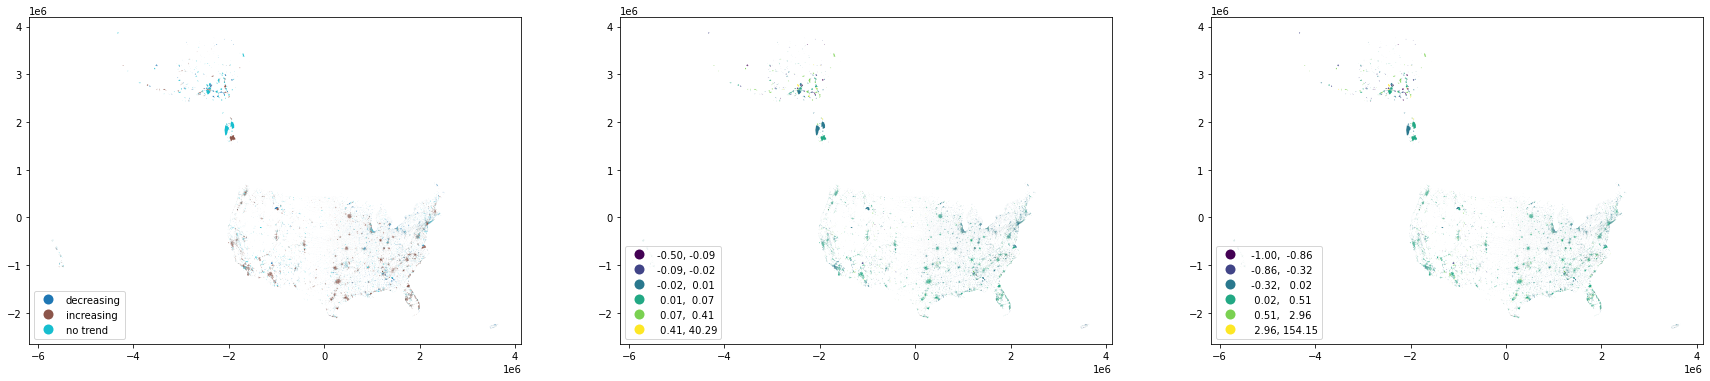

In [32]:
df_trend['GEOID'] = df_trend['GEO_ID'].str[9:]
# joining table data with spatial data
places_with_trend_base = US_places.merge(df_trend, on = 'GEOID', how = 'outer', indicator = True)
places_with_trend = places_with_trend_base[places_with_trend_base['_merge'] == 'both']

# places without geometries when match with 2020 US places data 
places_with_trend_base[places_with_trend_base['_merge'] == 'right_only'].GEOID.isin(US_places.GEOID).value_counts()

places_with_trend['density_km2'] =  pd.to_numeric(places_with_trend['P_20']) * 1000000 /places_with_trend['ALAND']

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 30))
# replacing inf by NaN
places_with_trend = places_with_trend.dropna()
places_with_trend.plot(column= 'trend', ax= ax[0], legend = True, legend_kwds={'loc': 'lower left'})
places_with_trend.plot(column = 'mean_changeRate', ax = ax[1], linewidth = 0, scheme='Percentiles', legend = True, legend_kwds={'loc': 'lower left'})
places_with_trend.plot(column = 'total_changeRate', ax = ax[2], linewidth = 0, scheme='Percentiles', legend = True, legend_kwds={'loc': 'lower left'})


In [33]:
#places_with_trend.shape

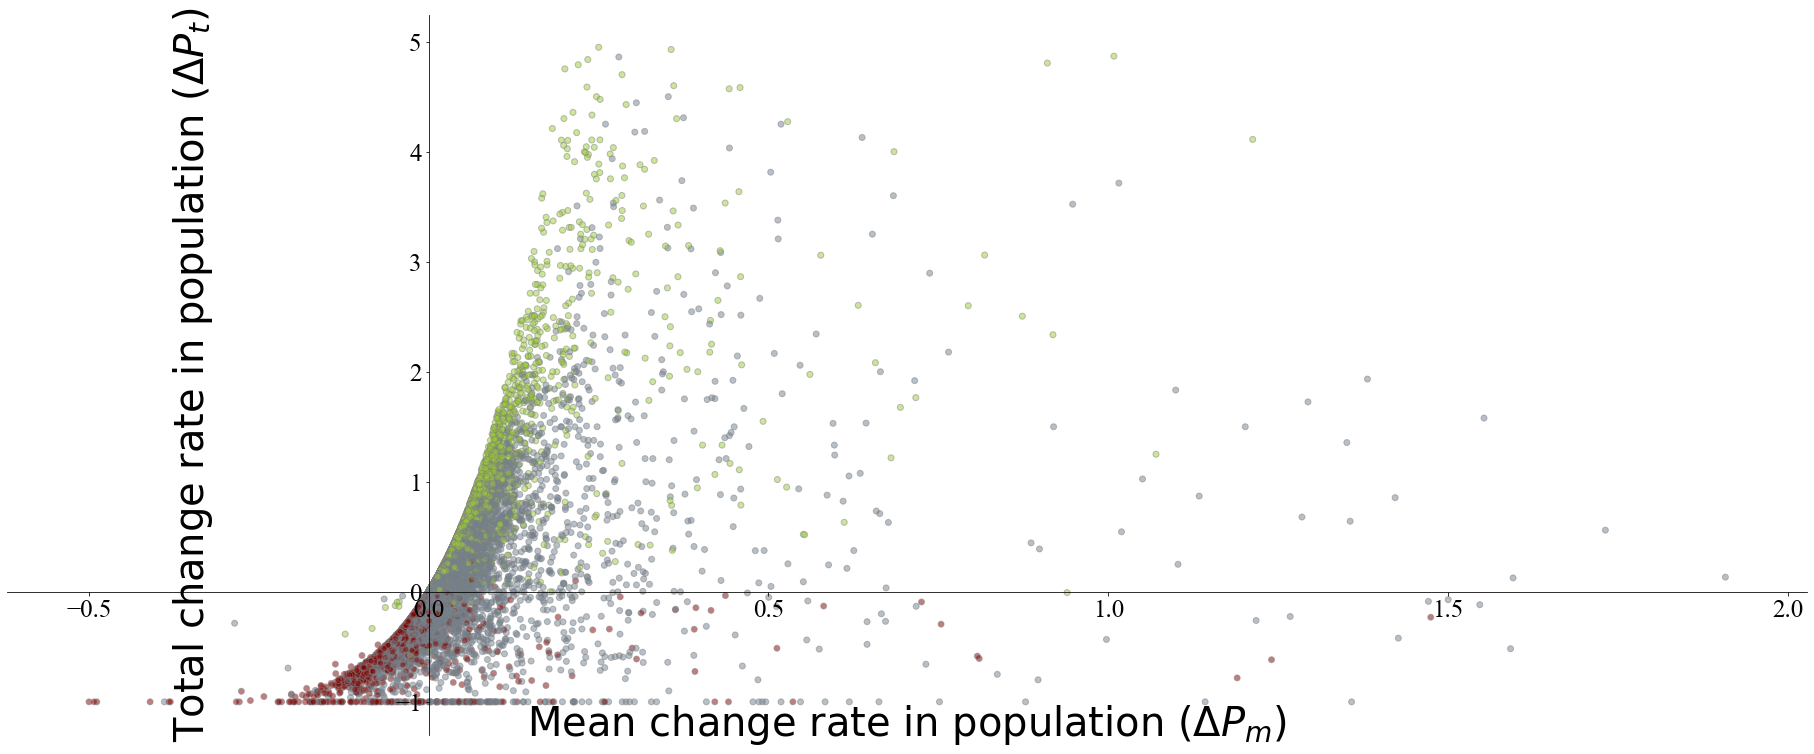

In [34]:
plot_df = df[(df['total_changeRate'] < 5) & (df['mean_changeRate'] < 2)]
plot_df = plot_df.replace('', np.nan, regex=True)
fig1 = plt.figure(figsize=[50,20]) 
axes1 = fig1.add_axes([-0.5,-0.5,0.5,0.5])
plt.rcParams['font.family'] = "Times New Roman"
axes1.set_xlabel("Mean change rate in population ($\Delta P_m$)", fontsize=40, labelpad = 80)
axes1.set_ylabel("Total change rate in population ($\Delta P_t$)", fontsize=40, labelpad= 180)
axes1.tick_params(axis='both', which='major', labelsize=25)
axes1.tick_params(axis='both', which='minor', labelsize=25)
axes1.spines.left.set_position('zero')
axes1.spines.right.set_color('none')
axes1.spines.bottom.set_position('zero')
axes1.spines.top.set_color('none')
#axes1.spines[['top', 'right']].set_visible(False)
#axes1.spines[['left','bottom']].set_position('center')

colors = {'decreasing':'maroon', 'increasing':'yellowgreen', 'no trend':'slategray', 'no data': 'grey'}
axes1.scatter(plot_df['mean_changeRate'], plot_df['total_changeRate'], 
              c = plot_df['trend'].map(colors), 
              alpha = .5, edgecolors='grey',
              #s = plot_df['density_km2']/5,
             )
# fig1.savefig(r'D:\Work\Box Sync\Trends_all states\Population classified.png', dpi = 300)
# fig1.savefig(r'D:\Work\Box Sync\Trends_all states\Population classified.pdf', dpi = 300)

plt.show()

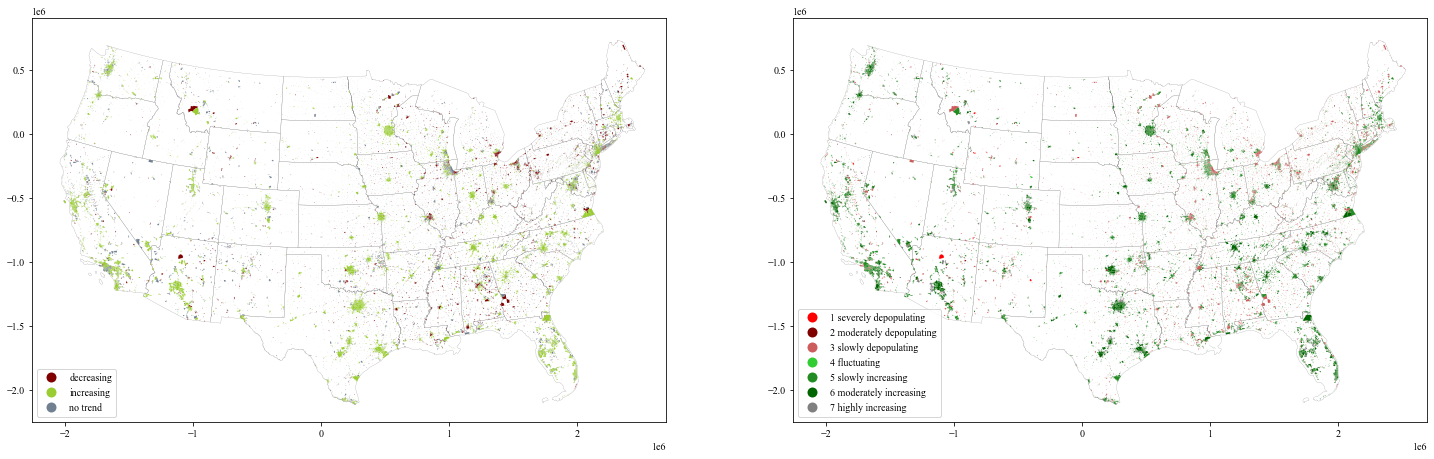

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 20))
columns = ['trend','label']
base_map = US_states
for ax,col in zip(ax.flatten(), columns):
    xlim = ([-2257388.37, 2695859.75]) 
    ylim = ([-2246944.04, 908095.9])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if col == 'trend':
        cmap_colors = matplotlib.colors.ListedColormap(['maroon','yellowgreen','slategray'])
    else:
        cmap_colors = matplotlib.colors.ListedColormap(['red', 'maroon', 'indianred', 'darkorange', 
                                                        'limegreen','forestgreen', 'darkgreen', 'gray'])
    US_states.plot(ax=ax, facecolor = 'none', edgecolor='gray', linewidth=0.2)
    places_with_trend.plot(column=col, ax=ax, cmap=cmap_colors, 
                           edgecolor='none',
                           legend = True,
                           legend_kwds={'loc': 'lower left'}
                           ) #, vmin=vmin, vmax=vmax)


In [36]:
# # plot for any specific state

# cmap_colors = matplotlib.colors.ListedColormap(['crimson', 'indianred', 'peachpuff', 'orange', 
#                                                  'yellowgreen', 'mediumseagreen', 'green'])
# # colorcode for white background
# # 'red', 'maroon', 'orangered', 'darkorange', 'limegreen','forestgreen', 'darkgreen', 'gray'
# # colorcode for black background
# # 'crimson', 'indianred', 'peachpuff', 'orange', 'yellowgreen', 'mediumseagreen', 'green'

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 12))
# # turning of axis tick labels
# ax.axis('off')
# # ax.set_xticks([])
# # ax.set_yticks([])

# US_counties[US_counties['STATEFP'] == '17'].to_crs('EPSG:3435').plot(ax=ax, facecolor = 'none', edgecolor='gray', linewidth=0.1)
# places_with_trend[places_with_trend['STATEFP'] == '17'].to_crs('EPSG:3435').plot(ax=ax, column = 'label', edgecolor='none',
#                                                                                  cmap=cmap_colors, #legend = True, 
#                                                                                  legend_kwds={'loc': 'lower left'},
#                                                                                  alpha = 0.8) #].value_counts()

# # ax.margins(0)
# # ax.apply_aspect()
# # black background by setting facecolor black
# ax.set_facecolor('xkcd:black')
# # removing grid from plot
# ax.grid(False)

# fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\Population labeled_IL.png', dpi = 300, 
#             bbox_inches='tight',
#             facecolor='black')

In [114]:
US_counties.columns

increasing    245
decreasing    328
no trend      794
Name: trend, dtype: int64

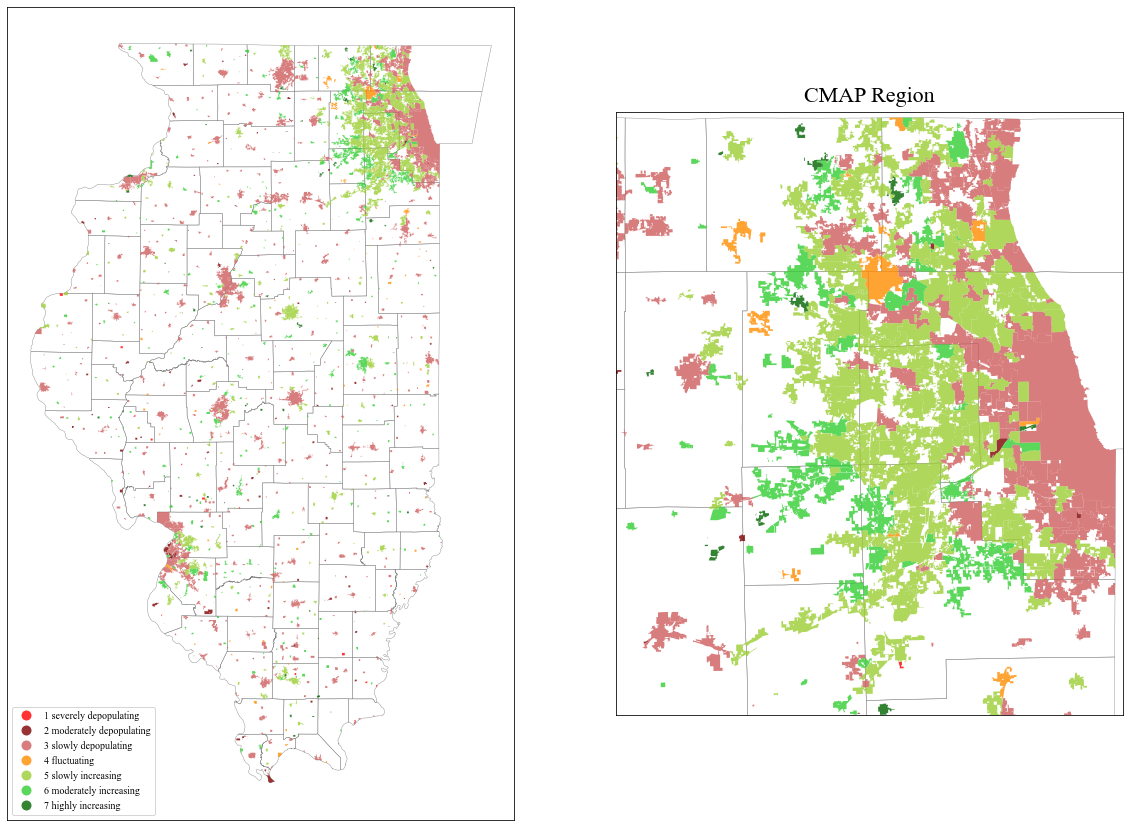

In [115]:
# for Illinois, results
df = places_with_trend
df_IL = df[df['STATEFP'] == '17'] #
df_IL = df_IL.to_crs("EPSG:4269")
df_IL.total_bounds

# pd.crosstab([df_IL.total_Rate, df_IL.trend], df_IL.mean_Rate)
df_IL['trend'].value_counts().sort_values()
df_IL['label'].value_counts().sort_values()
df_IL.groupby(['label','trend', ])['GEOID'].count().reset_index()

cmap_colors = matplotlib.colors.ListedColormap(['red', 'maroon', 'indianred', 'darkorange', 'yellowgreen',
                                                        'limegreen', 'darkgreen', ])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

US_counties[US_counties['STATEFP'] == '17'].to_crs("EPSG:4269").plot(ax=ax[0], facecolor = 'none', edgecolor='gray', linewidth=0.4)
df_IL.plot(column="label", ax=ax[0], cmap=cmap_colors, alpha = 0.8,
                                  legend = True,
                                  legend_kwds={'loc': 'lower left'}) 
ax[0].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

xlim = ([-88.966999, -87.502161])
ylim = ([41.17029799, 42.50830199]) 
ax[1].set_xlim(xlim)
ax[1].set_ylim(ylim)

US_counties[US_counties['STATEFP'] == '17'].to_crs("EPSG:4269").plot(ax=ax[1], facecolor = 'none', edgecolor='gray', linewidth=0.4)
df_IL.plot(column="label", ax=ax[1], cmap=cmap_colors, alpha = 0.8,
                                  #legend = True,
                                  legend_kwds={'loc': 'lower left'}) 
ax[1].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax[1].set_title('CMAP Region', fontsize=22, pad=10)

fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\Cities labeled only for Illinois.png', dpi = 300, bbox_inches='tight')


In [38]:
df[['STATEFP', 'NAME_y','Pop_estimate', 'P_20', 'mean_changeRate', 'total_changeRate','ALAND', 'density_km2']].sort_values(['total_changeRate', 'density_km2']).tail(10)

,STATEFP,NAME_y,Pop_estimate,P_20,mean_changeRate,total_changeRate,ALAND,density_km2
851,02,"Lutak CDP, Alaska","[6.0, 25.0, 11.0, 16.0, 12.0, 13.0, 0.0, 147.0...",190.0,1.497596,30.666667,328819145,0.577825
4116,08,"Trail Side CDP, Colorado","[0.0, 4.0, 4.0, 4.0, 0.0, 82.0, 103.0, 90.0, 1...",138.0,2.540295,33.500000,1855937,74.355972
788,02,"Dry Creek CDP, Alaska","[0.0, 7.0, 40.0, 70.0, 88.0, 84.0, 91.0, 90.0,...",262.0,0.813613,36.428571,363044448,0.721675
20535,38,"Green Acres CDP, North Dakota","[14.0, 237.0, 311.0, 484.0, 667.0, 784.0, 622....",618.0,1.727191,43.142857,3897841,158.549310
17206,34,"Belle Mead CDP, New Jersey","[124.0, 121.0, 136.0, 100.0, 171.0, 189.0, 196...",5492.0,2.677824,43.290323,10439935,526.056915
28566,49,"Vineyard town, Utah","[192.0, 161.0, 194.0, 177.0, 421.0, 901.0, 167...",8628.0,0.541918,43.937500,12419005,694.741648
20551,38,"Porcupine CDP, North Dakota","[0.0, 3.0, 50.0, 71.0, 144.0, 222.0, 252.0, 25...",162.0,1.936661,53.000000,523067,309.711758
1119,04,"Crozier CDP, Arizona","[0.0, 1.0, 2.0, 18.0, 24.0, 24.0, 23.0, 25.0, ...",80.0,1.204031,79.000000,2720285,29.408683
29249,51,"Arcola CDP, Virginia","[13.0, 9.0, 8.0, 187.0, 182.0, 229.0, 243.0, 6...",1761.0,2.511435,134.461538,5918431,297.545076
17227,34,"Byram Center CDP, New Jersey","[13.0, 30.0, 17.0, 53.0, 50.0, 39.0, 50.0, 57....",2017.0,5.373949,154.153846,7412230,272.117838


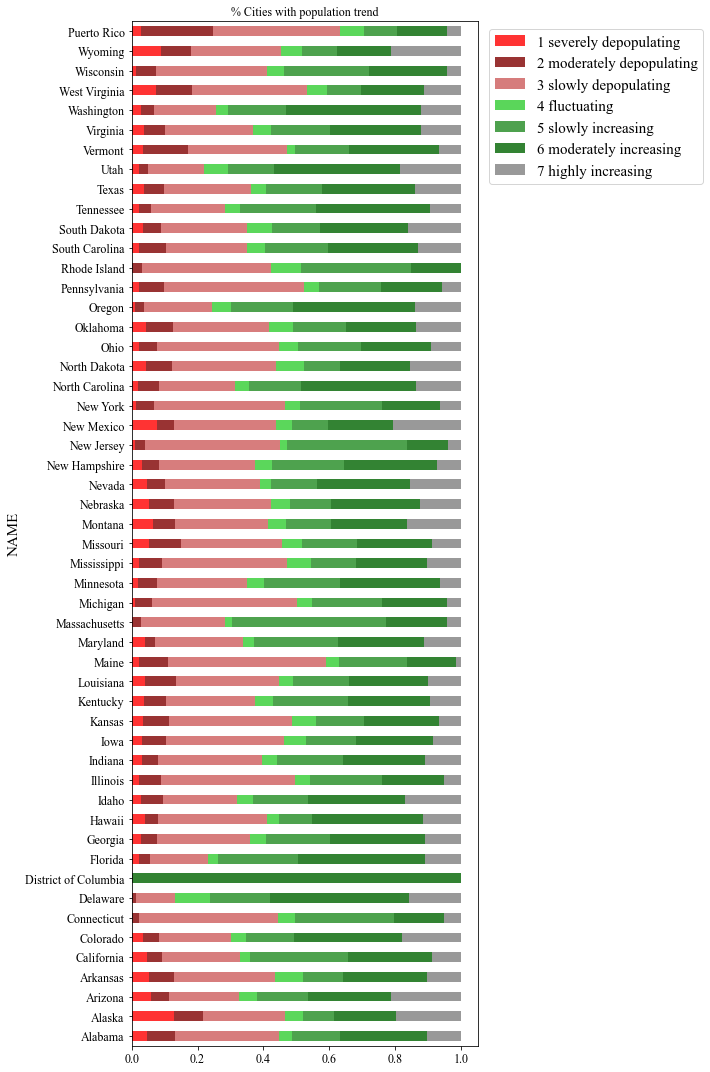

In [39]:
# get state names
state_names= US_states[['STATEFP', 'NAME']]
# Percent cities in each trend group
percent_cities = (df.groupby(['STATEFP','label']).count()[['GEOID']] / df.groupby(['STATEFP']).count()[['GEOID']]).reset_index()

table = pd.pivot_table(percent_cities, values='GEOID', index=['STATEFP'],
                    columns=['label'], aggfunc=np.sum).reset_index()

table = table.merge(state_names, on = 'STATEFP')
table.drop(columns = ['STATEFP'], inplace = True)

colors = ['red', 'maroon','indianred', 'orange', 'limegreen','forestgreen', 'darkgreen', 'gray']
cmap_color = matplotlib.colors.ListedColormap(colors)
# plot a Stacked Bar Chart using matplotlib
ax = table.plot(
    x = 'NAME',
    kind = 'barh',
    stacked = True,
    cmap = cmap_color, # 'tab20b',
    edgecolor='none',
    title = '% Cities with population trend',
    mark_right = True,
    figsize=(10, 15),
    alpha = 0.8)
# setting label sizes after creation
ax.yaxis.label.set_size(15)
ax.grid(False)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(bbox_to_anchor=(1.01, 1.00), loc='upper left', prop={'size': 15})
plt.tight_layout()
plt.show()

In [40]:
# pd.pivot_table(percent_cities, values='GEOID', index=['STATEFP'],columns=['label'], aggfunc=np.sum).reset_index()
# 09, 10, 11, 44
# df[(df['STATEFP'] == '44') & (df['label'] == '1 severely depopulating')]#['trend']

In [41]:
df[df['density_km2'] != 0].groupby('label')['density_km2'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
1 severely depopulating,887.0,103.95,225.25,0.01,13.69,39.23,107.71,2533.61
2 moderately depopulating,1837.0,269.25,445.77,0.02,70.60,158.06,307.43,11020.01
3 slowly depopulating,8855.0,497.93,698.35,0.04,126.34,310.12,595.12,29930.29
4 fluctuating,1479.0,336.99,438.05,0.04,82.75,205.83,415.91,4944.61
5 slowly increasing,5628.0,801.38,1021.51,0.12,246.26,490.73,1000.14,22572.24
6 moderately increasing,7298.0,542.49,712.31,0.01,158.55,350.34,661.81,16455.38
7 highly increasing,3002.0,356.92,556.35,0.03,60.59,179.66,434.65,7337.68


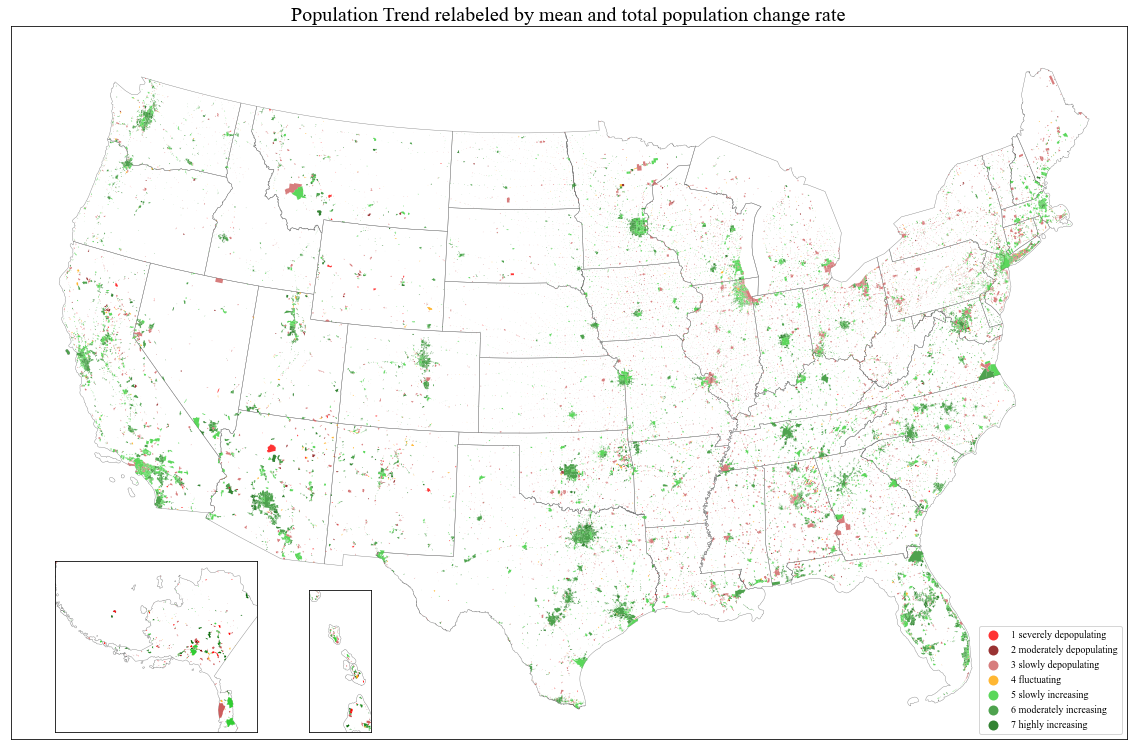

In [42]:
# import the United States shape file
# set state code as index, exclude states that we will never display
gdf = df.set_index('STATEFP') #.drop(index=['02', 'VI', 'MP', 'GU', 'AS'])
colors = [ 'red', 'maroon','indianred', 'orange', 'limegreen','forestgreen', 'darkgreen']
cmap_color = matplotlib.colors.ListedColormap(colors)
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(20, 30))
alaska_ax = continental_ax.inset_axes([.01, .01, .24, .24])
hawaii_ax = continental_ax.inset_axes([.22, .01, .15, .20])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2257388.37, 2695859.75)
continental_ax.set_ylim(-2246944.04, 918095.9)

alaska_ax.set_xlim(-4337634.21863075, -1564427.75408087)
alaska_ax.set_ylim(1528047.16872635, 3883917.63673733)

hawaii_ax.set_xlim(-5722090.887043, -5462538.83170424)
hawaii_ax.set_ylim(-1050846.93031638, -455238.37803499)

# Plot the data per area - requires passing the same choropleth parameters to each call
# because different data is used in each call, so automatically setting bounds won’t work
#vmin, vmax = df['ALAND'].agg(['min', 'max'])
US_states.plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.4)
gdf.plot(column="label", 
                                  ax=continental_ax,
                                  cmap=cmap_color,
                                  alpha = 0.8,
                                  legend = True,
                                  legend_kwds={'loc': 'lower right'}) #, vmin=vmin, vmax=vmax)

US_states.plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=alaska_ax)
gdf.plot(column="label", cmap=cmap_color, ax=alaska_ax) #, vmin=vmin, vmax=vmax)
US_states.plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=hawaii_ax)
gdf.plot(column="label", cmap=cmap_color, ax=hawaii_ax) #, vmin=vmin, vmax=vmax)

continental_ax.set_title('Population Trend relabeled by mean and total population change rate', fontsize=20, pad=5) 
#from ACS 5-yr population estimates using data from 2010-2020, (b) 

# remove ticks
for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.set_yticks([])
    ax.set_xticks([])
    
fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\cities_relabeled.png', dpi = 300, bbox_inches='tight')

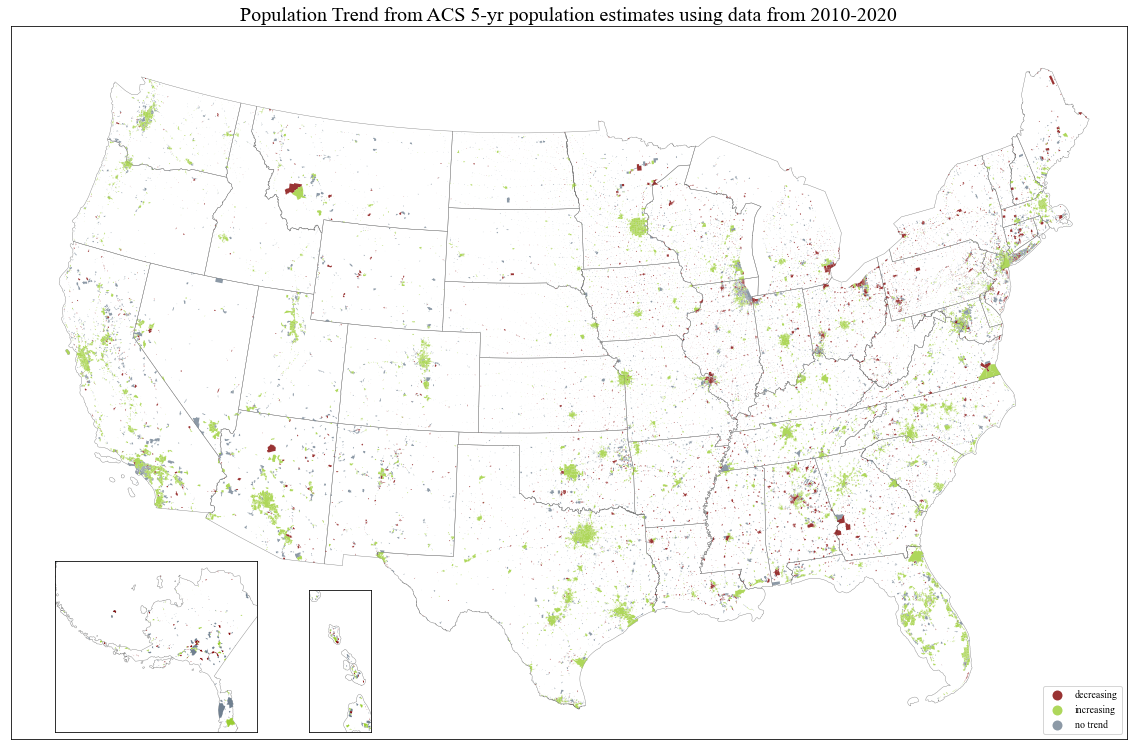

In [43]:
# import the United States shape file
# set state code as index, exclude states that we will never display
gdf = df.set_index('STATEFP') #.drop(index=['02', 'VI', 'MP', 'GU', 'AS'])
colors = ['maroon','yellowgreen','slategray']
cmap_color = matplotlib.colors.ListedColormap(colors)
# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(20, 30))
alaska_ax = continental_ax.inset_axes([.01, .01, .24, .24])
hawaii_ax = continental_ax.inset_axes([.22, .01, .15, .20])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2257388.37, 2695859.75)
continental_ax.set_ylim(-2246944.04, 918095.9)

alaska_ax.set_xlim(-4337634.21863075, -1564427.75408087)
alaska_ax.set_ylim(1528047.16872635, 3883917.63673733)

hawaii_ax.set_xlim(-5722090.887043, -5462538.83170424)
hawaii_ax.set_ylim(-1050846.93031638, -455238.37803499)

# Plot the data per area - requires passing the same choropleth parameters to each call
# because different data is used in each call, so automatically setting bounds won’t work
#vmin, vmax = df['ALAND'].agg(['min', 'max'])
US_states.plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.4)
gdf.plot(column="trend", ax=continental_ax, cmap=cmap_color,
                                  alpha = 0.8,
                                  legend = True,
                                  legend_kwds={'loc': 'lower right'}) #, vmin=vmin, vmax=vmax)

US_states.plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=alaska_ax)
gdf.plot(column="trend", cmap=cmap_color, ax=alaska_ax) #, vmin=vmin, vmax=vmax)
US_states.plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=hawaii_ax)
gdf.plot(column="trend", cmap=cmap_color, ax=hawaii_ax) #, vmin=vmin, vmax=vmax)

continental_ax.set_title('Population Trend from ACS 5-yr population estimates using data from 2010-2020', fontsize=20, pad=5) 
#, (b) 

# remove ticks
for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.set_yticks([])
    ax.set_xticks([])
    
fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\cities_ACS_population estimates.png', dpi = 300, bbox_inches='tight')

In [44]:
df[['GEO_ID', 'NAME_x', 'DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12', 'DP05_0001E_13',
       'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16', 'DP05_0001E_17',
       'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20', 'Pop_estimate',
       'trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept',
       'P_20', 'mean_changeRate', 'total_changeRate', 'mean_Rate',
       'total_Rate', 'label',  
    'density_km2']].to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\mktest_place_10-20_Continued_labeled.csv')  

In [45]:
df_changed.shape, df_continued.shape

((2915, 36), (29254, 26))

In [46]:
df.columns

Index(['STATEFP', 'PLACEFP', 'PLACENS', 'GEOID', 'NAME_x', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'PCICBSA', 'PCINECTA', 'MTFCC', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry', 'GEO_ID', 'NAME_y',
       'DP05_0001E', 'DP05_0001E_11', 'DP05_0001E_12', 'DP05_0001E_13',
       'DP05_0001E_14', 'DP05_0001E_15', 'DP05_0001E_16', 'DP05_0001E_17',
       'DP05_0001E_18', 'DP05_0001E_19', 'DP05_0001E_20', 'Pop_estimate',
       'trend', 'h', 'p', 'z', 'Tau', 's', 'var_s', 'slope', 'intercept',
       'P_20', 'mean_changeRate', 'total_changeRate', 'mean_Rate',
       'total_Rate', 'label', '_merge', 'density_km2'],
      dtype='object')